# Analyze A/B Test Results 

This project will assure you have mastered the subjects covered in the statistics lessons. We have organized the current notebook into the following sections: 

- [Introduction](#intro)
- [Part I - Probability](#probability)
- [Part II - A/B Test](#ab_test)
- [Part III - Regression](#regression)
- [Final Check](#finalcheck)
- [Submission](#submission)

Specific programming tasks are marked with a **ToDo** tag. 

<a id='intro'></a>
## Introduction

A/B tests are very commonly performed by data analysts and data scientists. For this project, you will be working to understand the results of an A/B test run by an e-commerce website.  Your goal is to work through this notebook to help the company understand if they should:
- Implement the new webpage, 
- Keep the old webpage, or 
- Perhaps run the experiment longer to make their decision.

Each **ToDo** task below has an associated quiz present in the classroom.  Though the classroom quizzes are **not necessary** to complete the project, they help ensure you are on the right track as you work through the project, and you can feel more confident in your final submission meeting the [rubric](https://review.udacity.com/#!/rubrics/1214/view) specification. 


<a id='probability'></a>
## Part I - Probability

To get started, let's import our libraries.

In [48]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
%matplotlib inline
#We are setting the seed to assure you get the same answers on quizzes as we set up
random.seed(42)

### ToDo 1.1
Now, read in the `ab_data.csv` data. Store it in `df`. Below is the description of the data, there are a total of 5 columns:

<center>

|Data columns|Purpose|Valid values|
| ------------- |:-------------| -----:|
|user_id|Unique ID|Int64 values|
|timestamp|Time stamp when the user visited the webpage|-|
|group|In the current A/B experiment, the users are categorized into two broad groups. <br>The `control` group users are expected to be served with `old_page`; and `treatment` group users are matched with the `new_page`. <br>However, **some inaccurate rows** are present in the initial data, such as a `control` group user is matched with a `new_page`. |`['control', 'treatment']`|
|landing_page|It denotes whether the user visited the old or new webpage.|`['old_page', 'new_page']`|
|converted|It denotes whether the user decided to pay for the company's product. Here, `1` means yes, the user bought the product.|`[0, 1]`|
</center>
Use your dataframe to answer the questions in Quiz 1 of the classroom.



**a.** Read in the dataset from the `ab_data.csv` file and take a look at the top few rows here:

In [49]:
# Read Data into DataFrame df
df = pd.read_csv('ab_data.csv')
df.head()

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1


**b.** Use the cell below to find the number of rows in the dataset.

In [50]:
# find the number of rows in the dataset
num_rows_dataset = df.shape[0]
print ('number of rows in the dataset: ', num_rows_dataset)

number of rows in the dataset:  294478


**c.** The number of unique users in the dataset.

In [51]:
# number of unique users in the dataset
unique_users = len(df.user_id.unique())
print ('number of unique users: ', unique_users)

number of unique users:  290584


**d.** The proportion of users converted.

In [52]:
# Find The proportion of users converted
prop_conv = df['converted'].mean()
print ('proportion of users converted: ', prop_conv)

proportion of users converted:  0.119659193556


**e.** The number of times when the "group" is `treatment` but "landing_page" is not a `new_page`.

In [53]:
# Find The number of times when the group and landing page don't match
treatment_bad = len(df.query('group == "treatment" and landing_page == "old_page"'))
control_bad = len(df.query('group == "control" and landing_page == "new_page"'))
print ('number of times group and landing page don''t match', treatment_bad+control_bad)


number of times group and landing page dont match 3893


**f.** Do any of the rows have missing values?

In [54]:
df.isnull().sum()

user_id         0
timestamp       0
group           0
landing_page    0
converted       0
dtype: int64

### ToDo 1.2  
In a particular row, the **group** and **landing_page** columns should have either of the following acceptable values:

|user_id| timestamp|group|landing_page|converted|
|---|---|---|---|---|
|XXXX|XXXX|`control`| `old_page`|X |
|XXXX|XXXX|`treatment`|`new_page`|X |


It means, the `control` group users should match with `old_page`; and `treatment` group users should matched with the `new_page`. 

However, for the rows where `treatment` does not match with `new_page` or `control` does not match with `old_page`, we cannot be sure if such rows truly received the new or old wepage.  


Use **Quiz 2** in the classroom to figure out how should we handle the rows where the group and landing_page columns don't match?

**a.** Now use the answer to the quiz to create a new dataset that meets the specifications from the quiz.  Store your new dataframe in **df2**.

In [55]:
# Remove the inaccurate rows, and store the result in a new dataframe df2
treatment_bad_indices = df.query('group == "treatment" and landing_page == "old_page"').index
control_bad_indices = df.query('group == "control" and landing_page == "new_page"').index
messy_indices = treatment_bad_indices.append(control_bad_indices)
df2 = df.drop(messy_indices)
len(df2)

290585

In [56]:
# Double Check all of the incorrect rows were removed from df2 - 
# Output of the statement below should be 0
df2[((df2['group'] == 'treatment') == (df2['landing_page'] == 'new_page')) == False].shape[0]

0

### ToDo 1.3  
Use **df2** and the cells below to answer questions for **Quiz 3** in the classroom.

**a.** How many unique **user_id**s are in **df2**?

In [57]:
print (len(df2.user_id.unique()))

290584


**b.** There is one **user_id** repeated in **df2**.  What is it?

In [58]:
# Find the Duplicated user_id
duplicated_row = df2[df2.duplicated('user_id', False)]


**c.** Display the rows for the duplicate **user_id**? 

In [59]:
# Display the rows of Duplicated user_id
print (duplicated_row)

      user_id                   timestamp      group landing_page  converted
1899   773192  2017-01-09 05:37:58.781806  treatment     new_page          0
2893   773192  2017-01-14 02:55:59.590927  treatment     new_page          0


**d.** Remove **one** of the rows with a duplicate **user_id**, from the **df2** dataframe.

In [60]:
# Remove one of the rows with a duplicate user_id..
# Hint: The dataframe.drop_duplicates() may not work in this case because the rows with duplicate user_id are not entirely identical. 
df2 = df2.drop(duplicated_row.index[0])

In [61]:
# Check again if the row with a duplicate user_id is deleted or not
print (df2[df2.duplicated('user_id', False)])

print (len(df2) - len(df2.user_id.unique()))

Empty DataFrame
Columns: [user_id, timestamp, group, landing_page, converted]
Index: []
0


### ToDo 1.4  
Use **df2** in the cells below to answer the quiz questions related to **Quiz 4** in the classroom.

**a.** What is the probability of an individual converting regardless of the page they receive?<br><br>

>**Tip**: The probability  you'll compute represents the overall "converted" success rate in the population and you may call it $p_{population}$.



In [62]:
p_pop = len(df2[df2['converted']==1])/len(df2)
print ('the probability of an individual converting regardless of the page they receive is: ', p_pop)


the probability of an individual converting regardless of the page they receive is:  0.11959708724499628


**b.** Given that an individual was in the `control` group, what is the probability they converted?

In [63]:
# Find the propability for an individual to convert, Given that he was in the control group
p_control_con = df2[df2['group']=='control']['converted'].mean()
print ('propability for an individual to convert, Given that he was in the control group: ', p_control_con)

propability for an individual to convert, Given that he was in the control group:  0.1203863045


**c.** Given that an individual was in the `treatment` group, what is the probability they converted?

In [64]:
# Find the propability for an individual to convert, Given that he was in the treatment group
p_treatment_con = df2[df2['group']=='treatment']['converted'].mean()
print ('propability for an individual to convert, Given that he was in the treatment group: ', p_treatment_con)

propability for an individual to convert, Given that he was in the treatment group:  0.118808065515


>**Tip**: The probabilities you've computed in the points (b). and (c). above can also be treated as conversion rate. 
Calculate the actual difference  (`obs_diff`) between the conversion rates for the two groups. You will need that later.  

In [65]:
# Calculate the actual difference (obs_diff) between the conversion rates for the two groups.
obs_diff = p_treatment_con - p_control_con
print ('obs_diff: ', obs_diff)


obs_diff:  -0.00157823898536


**d.** What is the probability that an individual received the new page?

In [66]:
# The probability that an individual received the new page
# hint: at this point we should notice rate of receiving a new page is equal to rate of treatment individuals
p_new_page = (df2['landing_page']=='new_page').mean()
print ('probability that an individual received the new page: ', p_new_page)

# making sure above hint is correct, we calculate propability for an individual to be treatment, should be identicalto p_new
p_new_Page_test = (df2['group']=='treatment').mean()
print ('probability that an individual received the new page: ', p_new_Page_test)

probability that an individual received the new page:  0.500061944223
probability that an individual received the new page:  0.500061944223


**e.** Consider your results from parts (a) through (d) above, and explain below whether the new `treatment` group users lead to more conversions.


it can be observed that, the treatment group users are making more conversions, however, later on we will do the A/B testing to see if we will success to reject the H-null statement, based on below:
H_0: obs_diff <= 0
H_1: obs_diff > 0

<a id='ab_test'></a>
## Part II - A/B Test

Since a timestamp is associated with each event, you could run a hypothesis test continuously as long as you observe the events. 

However, then the hard questions would be: 
- Do you stop as soon as one page is considered significantly better than another or does it need to happen consistently for a certain amount of time?  
- How long do you run to render a decision that neither page is better than another?  

These questions are the difficult parts associated with A/B tests in general.  


### ToDo 2.1
For now, consider you need to make the decision just based on all the data provided.  

> Recall that you just calculated that the "converted" probability (or rate) for the old page is *slightly* higher than that of the new page (ToDo 1.4.c). 

If you want to assume that the old page is better unless the new page proves to be definitely better at a Type I error rate of 5%, what should be your null and alternative hypotheses (**$H_0$** and **$H_1$**)?  

You can state your hypothesis in terms of words or in terms of **$p_{old}$** and **$p_{new}$**, which are the "converted" probability (or rate) for the old and new pages respectively.

H_0: p_new - p_old <= 0
H_1: p_new - p_old > 0

### ToDo 2.2 - Null Hypothesis $H_0$ Testing
Under the null hypothesis $H_0$, assume that $p_{new}$ and $p_{old}$ are equal. Furthermore, assume that $p_{new}$ and $p_{old}$ both are equal to the **converted** success rate in the `df2` data regardless of the page. So, our assumption is: <br><br>
<center>
$p_{new}$ = $p_{old}$ = $p_{population}$
</center>

In this section, you will: 

- Simulate (bootstrap) sample data set for both groups, and compute the  "converted" probability $p$ for those samples. 


- Use a sample size for each group equal to the ones in the `df2` data.


- Compute the difference in the "converted" probability for the two samples above. 


- Perform the sampling distribution for the "difference in the converted probability" between the two simulated-samples over 10,000 iterations; and calculate an estimate. 



Use the cells below to provide the necessary parts of this simulation.  You can use **Quiz 5** in the classroom to make sure you are on the right track.

**a.** What is the **conversion rate** for $p_{new}$ under the null hypothesis? 

In [67]:
# Find the conversion rate for  𝑝𝑛𝑒𝑤  under the null hypothesis
# under Null Hypotheis it is same as the probability of an individual converting regardless of the page they receive
p_new_null = len(df2[df2['converted']==1])/len(df2)
print ('conversion rate for  𝑝𝑛𝑒𝑤  under the null hypothesis is: ', p_new_null)


conversion rate for  𝑝𝑛𝑒𝑤  under the null hypothesis is:  0.11959708724499628


**b.** What is the **conversion rate** for $p_{old}$ under the null hypothesis? 

In [68]:
# Find the conversion rate for  𝑝𝑜𝑙𝑑  under the null hypothesis
# under Null Hypotheis it is same as the probability of an individual converting regardless of the page they receive
p_old_null = len(df2[df2['converted']==1])/len(df2)
print ('conversion rate for  𝑝𝑛𝑒𝑤  under the null hypothesis is: ', p_old_null)


conversion rate for  𝑝𝑛𝑒𝑤  under the null hypothesis is:  0.11959708724499628


**c.** What is $n_{new}$, the number of individuals in the treatment group? <br><br>
*Hint*: The treatment group users are shown the new page.

In [69]:
num_treatment = len(df2[df2['group']=='treatment'])
print ('𝑛𝑛𝑒𝑤 is: ', num_treatment)

𝑛𝑛𝑒𝑤 is:  145310


**d.** What is $n_{old}$, the number of individuals in the control group?

In [70]:
num_control = len(df2[df2['group']=='control'])
print ('𝑛old is: ', num_control)

𝑛old is:  145274


**e. Simulate Sample for the `treatment` Group**<br> 
Simulate $n_{new}$ transactions with a conversion rate of $p_{new}$ under the null hypothesis.  <br><br>
*Hint*: Use `numpy.random.choice()` method to randomly generate $n_{new}$ number of values. <br>
Store these $n_{new}$ 1's and 0's in the `new_page_converted` numpy array.


In [71]:
# Simulate a Sample for the treatment Group
new_page_converted = np.random.choice([0,1], num_treatment, p=[(1-p_new_null), p_new_null])
print ('new_page_converted', new_page_converted.mean())

new_page_converted 0.120741862226


**f. Simulate Sample for the `control` Group** <br>
Simulate $n_{old}$ transactions with a conversion rate of $p_{old}$ under the null hypothesis. <br> Store these $n_{old}$ 1's and 0's in the `old_page_converted` numpy array.

In [72]:
# Simulate a Sample for the control Group
old_page_converted = np.random.choice([0,1], num_control, p=[(1-p_old_null), p_old_null])
print ('old_page_converted ', old_page_converted.mean())

old_page_converted  0.118259289343


**g.** Find the difference in the "converted" probability $(p{'}_{new}$ - $p{'}_{old})$ for your simulated samples from the parts (e) and (f) above. 

In [73]:
p_diff = new_page_converted.mean() - old_page_converted.mean()
print ('p_diff', p_diff)

p_diff 0.00248257288269



**h. Sampling distribution** <br>
Re-create `new_page_converted` and `old_page_converted` and find the $(p{'}_{new}$ - $p{'}_{old})$ value 10,000 times using the same simulation process you used in parts (a) through (g) above. 

<br>
Store all  $(p{'}_{new}$ - $p{'}_{old})$  values in a NumPy array called `p_diffs`.

In [74]:
# Sampling distribution 
p_diffs = (np.random.binomial(num_treatment, p_new_null, 10000)/num_treatment) - (np.random.binomial(num_control, p_old_null, 10000)/num_control)

In [75]:
# mean of p_diffs must tend to Zero, lets check it
print ('p_diffs_mnea_value', p_diffs.mean())

p_diffs_mnea_value 1.094514105e-05


**i. Histogram**<br> 
Plot a histogram of the **p_diffs**.  Does this plot look like what you expected?  Use the matching problem in the classroom to assure you fully understand what was computed here.<br><br>

Also, use `plt.axvline()` method to mark the actual difference observed  in the `df2` data (recall `obs_diff`), in the chart.  

>**Tip**: Display title, x-label, and y-label in the chart.

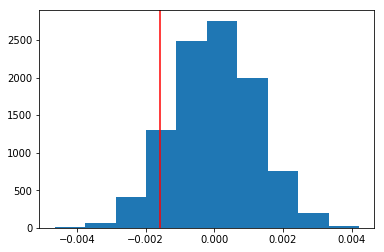

In [76]:
plt.hist(p_diffs);
plt.axvline(obs_diff, c='red')

**j.** What proportion of the **p_diffs** are greater than the actual difference observed in the `df2` data?

In [77]:
p_value = (p_diffs>obs_diff).mean()
p_value

0.90549999999999997

**k.** Please explain in words what you have just computed in part **j** above.  
 - What is this value called in scientific studies?  
 - What does this value signify in terms of whether or not there is a difference between the new and old pages? *Hint*: Compare the value above with the "Type I error rate (0.05)". 

>
the calculated value in J is called in scientific studies the "p_value" and its value as 0.908 is large enough compared to the "Type I error rate (0.05) to say we failed to reject the null hypothises using the converted ratio metric





**l. Using Built-in Methods for Hypothesis Testing**<br>
We could also use a built-in to achieve similar results.  Though using the built-in might be easier to code, the above portions are a walkthrough of the ideas that are critical to correctly thinking about statistical significance. 

Fill in the statements below to calculate the:
- `convert_old`: number of conversions with the old_page
- `convert_new`: number of conversions with the new_page
- `n_old`: number of individuals who were shown the old_page
- `n_new`: number of individuals who were shown the new_page


In [78]:
import statsmodels.api as sm

# number of conversions with the old_page
convert_old = len(df2[(df2['group']=='control')&(df2['converted']==1)])

# number of conversions with the new_page
convert_new = len(df2[(df2['group']=='treatment')&(df2['converted']==1)])

# number of individuals who were shown the old_page
n_old = len(df2[df2['group']=='control'])

# number of individuals who received new_page
n_new = len(df2[df2['group']=='treatment'])

print ('convert_old', convert_old, 'convert_new', convert_new, 'n_old', n_old, 'n_new', n_new)

convert_old 17489 convert_new 17264 n_old 145274 n_new 145310


**m.** Now use `sm.stats.proportions_ztest()` to compute your test statistic and p-value.  [Here](https://www.statsmodels.org/stable/generated/statsmodels.stats.proportion.proportions_ztest.html) is a helpful link on using the built in.

The syntax is: 
```bash
proportions_ztest(count_array, nobs_array, alternative='larger')
```
where, 
- `count_array` = represents the number of "converted" for each group
- `nobs_array` = represents the total number of observations (rows) in each group
- `alternative` = choose one of the values from `[‘two-sided’, ‘smaller’, ‘larger’]` depending upon two-tailed, left-tailed, or right-tailed respectively. 
>**Hint**: <br>
It's a two-tailed if you defined $H_1$ as $(p_{new} = p_{old})$. <br>
It's a left-tailed if you defined $H_1$ as $(p_{new} < p_{old})$. <br>
It's a right-tailed if you defined $H_1$ as $(p_{new} > p_{old})$. 

The built-in function above will return the z_score, p_value. 

---
### About the two-sample z-test
Recall that you have plotted a distribution `p_diffs` representing the
difference in the "converted" probability  $(p{'}_{new}-p{'}_{old})$  for your two simulated samples 10,000 times. 

Another way for comparing the mean of two independent and normal distribution is a **two-sample z-test**. You can perform the Z-test to calculate the Z_score, as shown in the equation below:

$$
Z_{score} = \frac{ (p{'}_{new}-p{'}_{old}) - (p_{new}  -  p_{old})}{ \sqrt{ \frac{\sigma^{2}_{new} }{n_{new}} + \frac{\sigma^{2}_{old} }{n_{old}}  } }
$$

where,
- $p{'}$ is the "converted" success rate in the sample
- $p_{new}$ and $p_{old}$ are the "converted" success rate for the two groups in the population. 
- $\sigma_{new}$ and $\sigma_{new}$ are the standard deviation for the two groups in the population. 
- $n_{new}$ and $n_{old}$ represent the size of the two groups or samples (it's same in our case)


>Z-test is performed when the sample size is large, and the population variance is known. The z-score represents the distance between the two "converted" success rates in terms of the standard error. 

Next step is to make a decision to reject or fail to reject the null hypothesis based on comparing these two values: 
- $Z_{score}$
- $Z_{\alpha}$ or $Z_{0.05}$, also known as critical value at 95% confidence interval.  $Z_{0.05}$ is 1.645 for one-tailed tests,  and 1.960 for two-tailed test. You can determine the $Z_{\alpha}$ from the z-table manually. 

Decide if your hypothesis is either a two-tailed, left-tailed, or right-tailed test. Accordingly, reject OR fail to reject the  null based on the comparison between $Z_{score}$ and $Z_{\alpha}$. 
>Hint:<br>
For a right-tailed test, reject null if $Z_{score}$ > $Z_{\alpha}$. <br>
For a left-tailed test, reject null if $Z_{score}$ < $Z_{\alpha}$. 


In other words, we determine whether or not the $Z_{score}$ lies in the "rejection region" in the distribution. A "rejection region" is an interval where the null hypothesis is rejected iff the $Z_{score}$ lies in that region.



Reference: 
- Example 9.1.2 on this [page](https://stats.libretexts.org/Bookshelves/Introductory_Statistics/Book%3A_Introductory_Statistics_(Shafer_and_Zhang)/09%3A_Two-Sample_Problems/9.01%3A_Comparison_of_Two_Population_Means-_Large_Independent_Samples), courtesy www.stats.libretexts.org



In [79]:
import statsmodels.api as sm
# ToDo: Complete the sm.stats.proportions_ztest() method arguments
z_score, p_value = sm.stats.proportions_ztest(np.array([convert_new, convert_old]), np.array([n_new, n_old]), alternative='larger')
print(z_score, p_value)

-1.31092419842 0.905058312759


**n.** What do the z-score and p-value you computed in the previous question mean for the conversion rates of the old and new pages?  Do they agree with the findings in parts **j.** and **k.**?<br><br>



>Results are in alignment with the results in parts j & k where we can notice that p_value is almost equal to the one we get above in j, also as in k we failed to reject the null hypothises, we also failed to reject it gere since Z_score is not larger than the alpha (0.05) based on the statement that $Z_{score}$ > $Z_{\alpha}$ is the case where we belive we can reject the H_null in the right tailed test, but it didn't happen and what we can notice is that $Z_{score}$ < $Z_{\alpha}$ after the calculations 

<a id='regression'></a>
### Part III - A regression approach

### ToDo 3.1 
In this final part, you will see that the result you achieved in the A/B test in Part II above can also be achieved by performing regression.<br><br> 

**a.** Since each row in the `df2` data is either a conversion or no conversion, what type of regression should you be performing in this case?

since there are only two options, then Logistic regression is to be performed

**b.** The goal is to use **statsmodels** library to fit the regression model you specified in part **a.** above to see if there is a significant difference in conversion based on the page-type a customer receives. However, you first need to create the following two columns in the `df2` dataframe:
 1. `intercept` - It should be `1` in the entire column. 
 2. `ab_page` - It's a dummy variable column, having a value `1` when an individual receives the **treatment**, otherwise `0`.  

In [80]:
df2['intercept'] = 1
df2[['control', 'ab_page']] = pd.get_dummies(df['group'])

df2.head()
# hint: must see treatment column equal one in case of group = 'treatment' only and vice versa for 'control'

,user_id,timestamp,group,landing_page,converted,intercept,control,ab_page
0,851104,2017-01-21 22:11:48.556739,control,old_page,0,1,1,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0,1,1,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0,1,0,1
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0,1,0,1
4,864975,2017-01-21 01:52:26.210827,control,old_page,1,1,1,0


**c.** Use **statsmodels** to instantiate your regression model on the two columns you created in part (b). above, then fit the model to predict whether or not an individual converts. 


In [81]:
mod = sm.Logit(df2['converted'], df2[['intercept', 'ab_page']])
fit = mod.fit()
results = fit.summary2()


Optimization terminated successfully.
         Current function value: 0.366118
         Iterations 6


**d.** Provide the summary of your model below, and use it as necessary to answer the following questions.

In [82]:
print (results)

                          Results: Logit
Model:              Logit            No. Iterations:   6.0000     
Dependent Variable: converted        Pseudo R-squared: 0.000      
Date:               2022-01-12 12:58 AIC:              212780.3502
No. Observations:   290584           BIC:              212801.5095
Df Model:           1                Log-Likelihood:   -1.0639e+05
Df Residuals:       290582           LL-Null:          -1.0639e+05
Converged:          1.0000           Scale:            1.0000     
-------------------------------------------------------------------
              Coef.   Std.Err.      z      P>|z|    [0.025   0.975]
-------------------------------------------------------------------
intercept    -1.9888    0.0081  -246.6690  0.0000  -2.0046  -1.9730
ab_page      -0.0150    0.0114    -1.3109  0.1899  -0.0374   0.0074



**e.** What is the p-value associated with **ab_page**? Why does it differ from the value you found in **Part II**?<br><br>  

**Hints**: 
- What are the null and alternative hypotheses associated with your regression model, and how do they compare to the null and alternative hypotheses in **Part II**? 
- You may comment on if these hypothesis (Part II vs. Part III) are one-sided or two-sided. 
- You may also compare the current p-value with the Type I error rate (0.05).


Observations: 
- p_value associated with ab_page is 0.1899
- p_value is different because the null and alternative hypothesis in the model is different from those in the AB testing we did
- null hypothesis: Beta_1 (slope) is equal to zero, that means in english there is no change in the response with any change in explanatory, this means specifically in our case that receiving new page dosent change the convert ratio
- alternative hypothesis: Beta_1 (slope) is NOT equal to zero, that means there is a change in the response associated with the change in explanatory, in our case this means receiving new page is having a change to the convert ratio
- hypothesis in part II is one-sided but in part III is two-sided
- comparing the p_value to alpha of 0.05 suggests we fail to reject null hypothesis mentioned above, that is we don't suggest to go for the new page which in fact aligned with AB testing done in part II


**f.** Now, you are considering other things that might influence whether or not an individual converts.  Discuss why it is a good idea to consider other factors to add into your regression model.  Are there any disadvantages to adding additional terms into your regression model?

it is always a good idea to consider other factors to avoid falling in Simpson's Paradox

**g. Adding countries**<br> 
Now along with testing if the conversion rate changes for different pages, also add an effect based on which country a user lives in. 

1. You will need to read in the **countries.csv** dataset and merge together your `df2` datasets on the appropriate rows. You call the resulting dataframe `df_merged`. [Here](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.join.html) are the docs for joining tables. 

2. Does it appear that country had an impact on conversion?  To answer this question, consider the three unique values, `['UK', 'US', 'CA']`, in the `country` column. Create dummy variables for these country columns. 
>**Hint:** Use `pandas.get_dummies()` to create dummy variables. **You will utilize two columns for the three dummy variables.** 

 Provide the statistical output as well as a written response to answer this question.

In [83]:
# Read the countries.csv
df3 = pd.read_csv('countries.csv')
df3.head()

,user_id,country
0,834778,UK
1,928468,US
2,822059,UK
3,711597,UK
4,710616,UK


In [84]:
# Join with the df2 dataframe
df_merged = df2.join(df3.set_index('user_id'), on = ['user_id'])
print (df_merged.head())

   user_id                   timestamp      group landing_page  converted  \
0   851104  2017-01-21 22:11:48.556739    control     old_page          0   
1   804228  2017-01-12 08:01:45.159739    control     old_page          0   
2   661590  2017-01-11 16:55:06.154213  treatment     new_page          0   
3   853541  2017-01-08 18:28:03.143765  treatment     new_page          0   
4   864975  2017-01-21 01:52:26.210827    control     old_page          1   

   intercept  control  ab_page country  
0          1        1        0      US  
1          1        1        0      US  
2          1        0        1      US  
3          1        0        1      US  
4          1        1        0      US  


In [85]:
# Create the necessary dummy variables
df_merged[['CA', 'UK', 'US']] = pd.get_dummies(df_merged['country'])
print (df_merged.head())

   user_id                   timestamp      group landing_page  converted  \
0   851104  2017-01-21 22:11:48.556739    control     old_page          0   
1   804228  2017-01-12 08:01:45.159739    control     old_page          0   
2   661590  2017-01-11 16:55:06.154213  treatment     new_page          0   
3   853541  2017-01-08 18:28:03.143765  treatment     new_page          0   
4   864975  2017-01-21 01:52:26.210827    control     old_page          1   

   intercept  control  ab_page country  CA  UK  US  
0          1        1        0      US   0   0   1  
1          1        1        0      US   0   0   1  
2          1        0        1      US   0   0   1  
3          1        0        1      US   0   0   1  
4          1        1        0      US   0   0   1  


In [86]:
# Fit the model, and summarize the results
mod = sm.Logit(df_merged['converted'], df_merged[['intercept', 'CA', 'UK']])
fit = mod.fit()
results = fit.summary2()
results

Optimization terminated successfully.
         Current function value: 0.366116
         Iterations 6


<class 'statsmodels.iolib.summary2.Summary'>
"""
                          Results: Logit
==================================================================
Model:              Logit            No. Iterations:   6.0000     
Dependent Variable: converted        Pseudo R-squared: 0.000      
Date:               2022-01-12 12:58 AIC:              212780.8333
No. Observations:   290584           BIC:              212812.5723
Df Model:           2                Log-Likelihood:   -1.0639e+05
Df Residuals:       290581           LL-Null:          -1.0639e+05
Converged:          1.0000           Scale:            1.0000     
-------------------------------------------------------------------
              Coef.   Std.Err.      z      P>|z|    [0.025   0.975]
-------------------------------------------------------------------
intercept    -1.9967    0.0068  -292.3145  0.0000  -2.0101  -1.9833
CA           -0.0408    0.0269    -1.5178  0.1291  -0.0935   0.0119
UK            0.0099    0.0133     0.7458  0.4558  -0.0161   0.0360
==================================================================

"""

In [87]:
1/np.exp(-0.0408), np.exp(0.0099)

(1.0416437559600236, 1.0099491671175422)

based on the exponential of coeffiecent results, i believe the three countries are liekly to convert almost same regardless of receiving new page or not, as per below statical reasons:

- inverse of exp of CA coefficient is 1.04, that means CA is almost likely to convert same as our baseline (US), regardless of using new page or not
- exp of UK coefficient is 1.01, that means UK is almost likely to convert same as our baseline (US), regardless of using new page or not
- by looking at the confidence intervals, we can compare UK and CA users, as we can see an overlap, so this suggests that UK and CA will have the same convertion regardless of using new page or not

**h. Fit your model and obtain the results**<br> 
Though you have now looked at the individual factors of country and page on conversion, we would now like to look at an interaction between page and country to see if are there significant effects on conversion.  **Create the necessary additional columns, and fit the new model.** 


In [88]:
# create the interaction new columns
df_merged['ab_UK'] = df_merged['ab_page'] * df_merged['UK']
df_merged['ab_CA'] = df_merged['ab_page'] * df_merged['CA']
df_merged['ab_US'] = df_merged['ab_page'] * df_merged['US']


print (df_merged.head())

   user_id                   timestamp      group landing_page  converted  \
0   851104  2017-01-21 22:11:48.556739    control     old_page          0   
1   804228  2017-01-12 08:01:45.159739    control     old_page          0   
2   661590  2017-01-11 16:55:06.154213  treatment     new_page          0   
3   853541  2017-01-08 18:28:03.143765  treatment     new_page          0   
4   864975  2017-01-21 01:52:26.210827    control     old_page          1   

   intercept  control  ab_page country  CA  UK  US  ab_UK  ab_CA  ab_US  
0          1        1        0      US   0   0   1      0      0      0  
1          1        1        0      US   0   0   1      0      0      0  
2          1        0        1      US   0   0   1      0      0      1  
3          1        0        1      US   0   0   1      0      0      1  
4          1        1        0      US   0   0   1      0      0      0  


In [89]:
# Fit the model, and summarize the results
logit_mod = sm.Logit(df_merged['converted'], df_merged[['intercept','ab_page','UK','CA','ab_UK', 'ab_CA']])
logit_fit = logit_mod.fit()
results_interactions = logit_fit.summary2()
results_interactions

Optimization terminated successfully.
         Current function value: 0.366109
         Iterations 6


<class 'statsmodels.iolib.summary2.Summary'>
"""
                          Results: Logit
==================================================================
Model:              Logit            No. Iterations:   6.0000     
Dependent Variable: converted        Pseudo R-squared: 0.000      
Date:               2022-01-12 12:58 AIC:              212782.6602
No. Observations:   290584           BIC:              212846.1381
Df Model:           5                Log-Likelihood:   -1.0639e+05
Df Residuals:       290578           LL-Null:          -1.0639e+05
Converged:          1.0000           Scale:            1.0000     
-------------------------------------------------------------------
              Coef.   Std.Err.      z      P>|z|    [0.025   0.975]
-------------------------------------------------------------------
intercept    -1.9865    0.0096  -206.3440  0.0000  -2.0053  -1.9676
ab_page      -0.0206    0.0137    -1.5052  0.1323  -0.0473   0.0062
UK           -0.0057    0.0188    -0.3057  0.7598  -0.0426   0.0311
CA           -0.0175    0.0377    -0.4652  0.6418  -0.0914   0.0563
ab_UK         0.0314    0.0266     1.1807  0.2377  -0.0207   0.0835
ab_CA        -0.0469    0.0538    -0.8718  0.3833  -0.1523   0.0585
==================================================================

"""

In [90]:
# calculate exponential of coefficients
np.exp(-1.9865) , np.exp(-0.0206), np.exp(-0.0057), np.exp(-0.0175), np.exp(0.0314), np.exp(-0.0469)

(0.13717469767172208,
 0.97961073050325054,
 0.99431621417843319,
 0.9826522356650732,
 1.0318981806179213,
 0.95418281110072622)

Well! looking at p-values, there is no statical significance even after adding the interactions, also as we see from the exponential of coefficients, all of them are close to 1, which suggests they have the same effect to the converstion in comparison to the baselines 

**Project Final Conclusion:**<br>
as a final conclusion, i think we failed to prove that we can reject the null hyposthesis, that means based on the data we have and tests we have done, we are far from being confident enough to assume that population is likely to convert if they received the new page!

In [91]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Analyze_ab_test_results_notebook.ipynb'])

0